In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
from random import randint

In [2]:
df = np.loadtxt('cluster.dat').T
data = pd.DataFrame(df, columns = ["X","Y"])

In [3]:
np.random.seed(0)
t_max = 5
mean = np.mean(data.values, axis=0)
w = np.zeros((2,2))
w[0] = np.random.uniform(mean[0]-0.2*mean[0],mean[0]+0.2*mean[0],[1,2])
w[1] = np.random.uniform(mean[1]-0.2*mean[1],mean[1]+0.2*mean[1],[1,2])
w = w.T

In [4]:
def errorCluster(points, w):
    sumErr = 0.0
    for point in points:
        sumErr += LA.norm(w-point)
    return sumErr

In [5]:
def kMeans(k, data):
    t_max = 5
    mean = np.mean(data, axis=0)
    w = np.zeros((2,k))
        
    w[0] = np.random.uniform(mean[0]-0.5*mean[0],mean[0]+0.5*mean[0],[1,k])
    w[1] = np.random.uniform(mean[1]-0.5*mean[1],mean[1]+0.5*mean[1],[1,k])
    w = w.T
    
    centroidsIteration = []
    clustersIteration = []        
    errors = []
    for t in np.arange(t_max):
        clusters = []
        for ki in np.arange(k):
            clusters.append([])
        dist = np.zeros(k)    
        for point in data:
            for kj in np.arange(k): 
                dist[kj] = LA.norm(w[kj]-point)
            clusters[np.argmin(dist)].append(point.tolist())
        
        clusters2 = np.array(clusters)
        for i in np.arange(len(clusters)):
            clusters[i] = np.array(clusters[i])
        clustersIteration.append(clusters)
        err = 0.0
        for ki in np.arange(k):
            if(len(clusters2[ki]) != 0):
                w[ki] = np.mean(clusters2[ki], axis=0)
            err += errorCluster(clusters2[ki], w[ki])
        
        err = err/data.shape[0]
        errors.append(err)
        centroidsIteration.append(w)
        
    return centroidsIteration, clustersIteration, errors

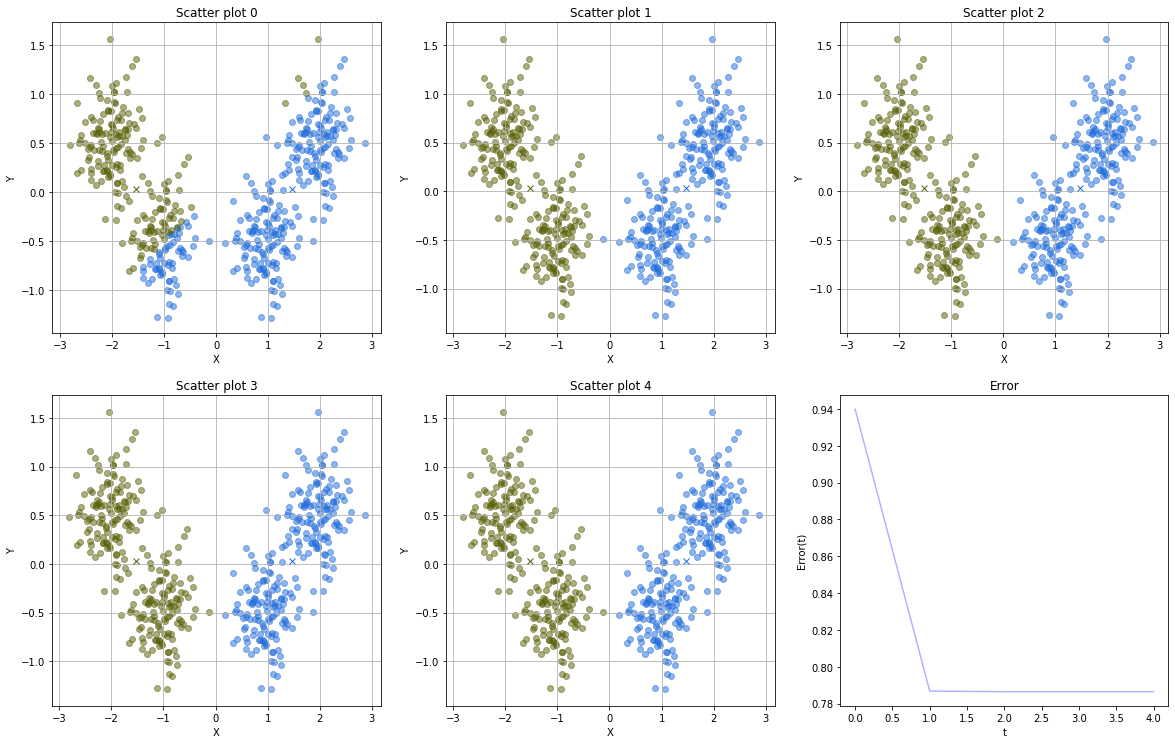

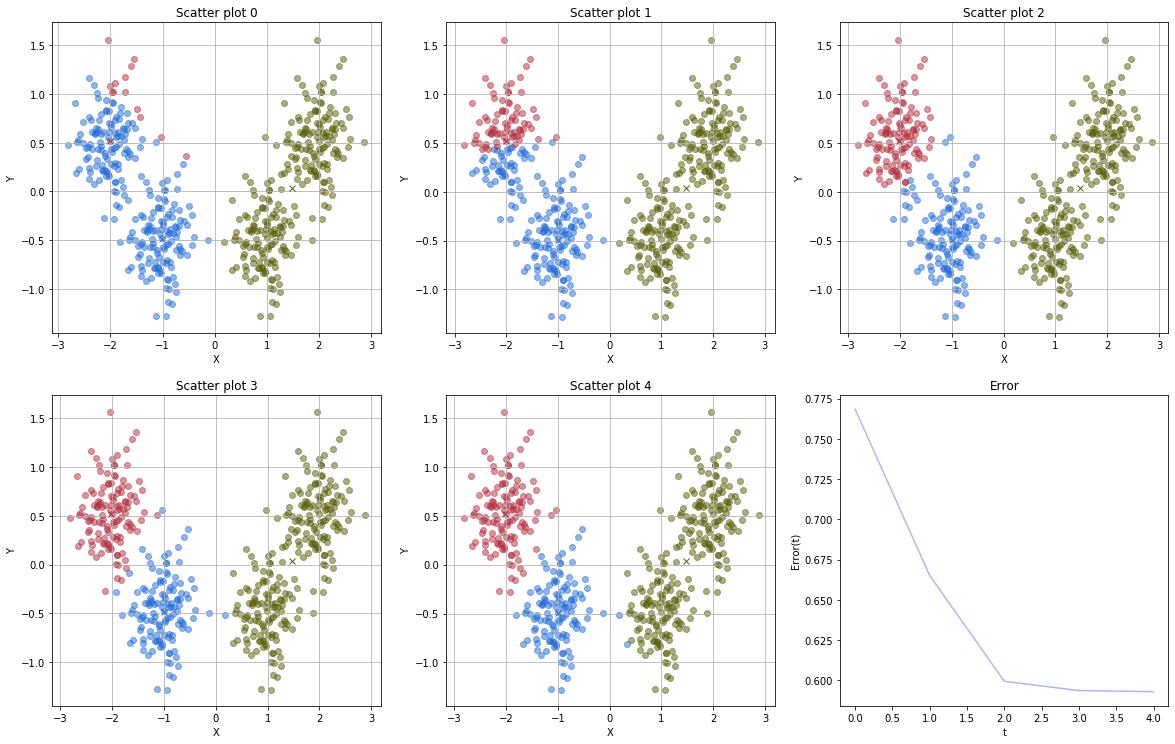

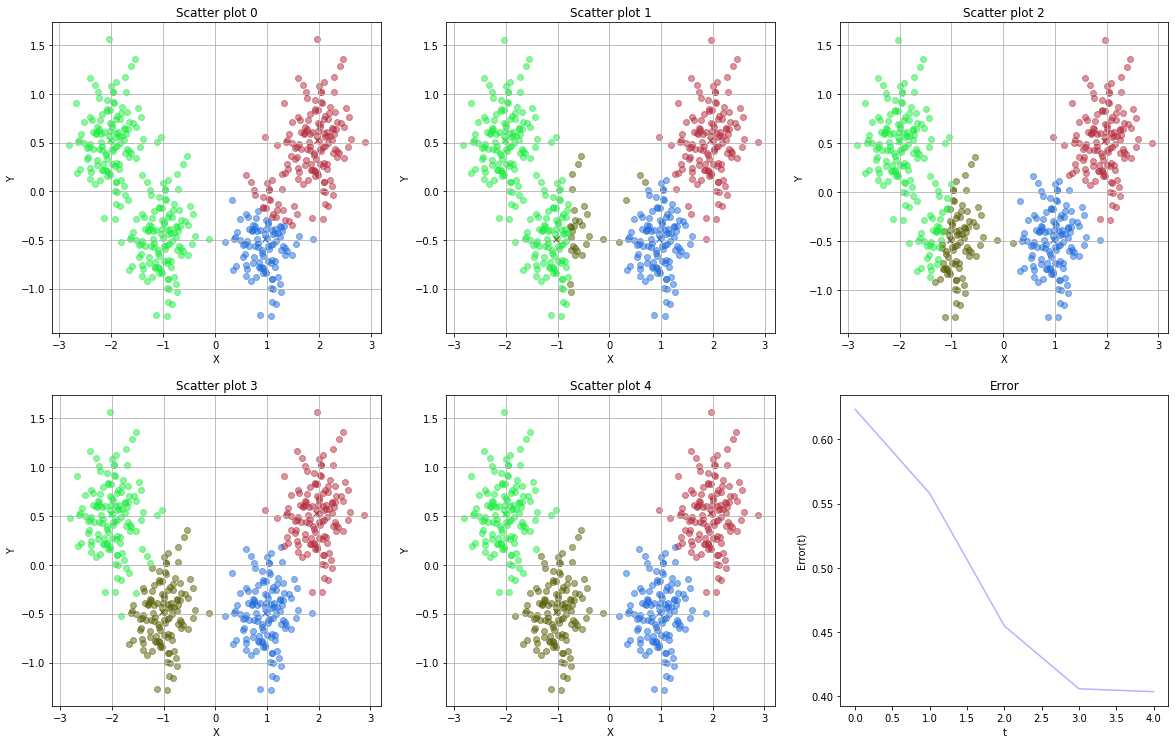

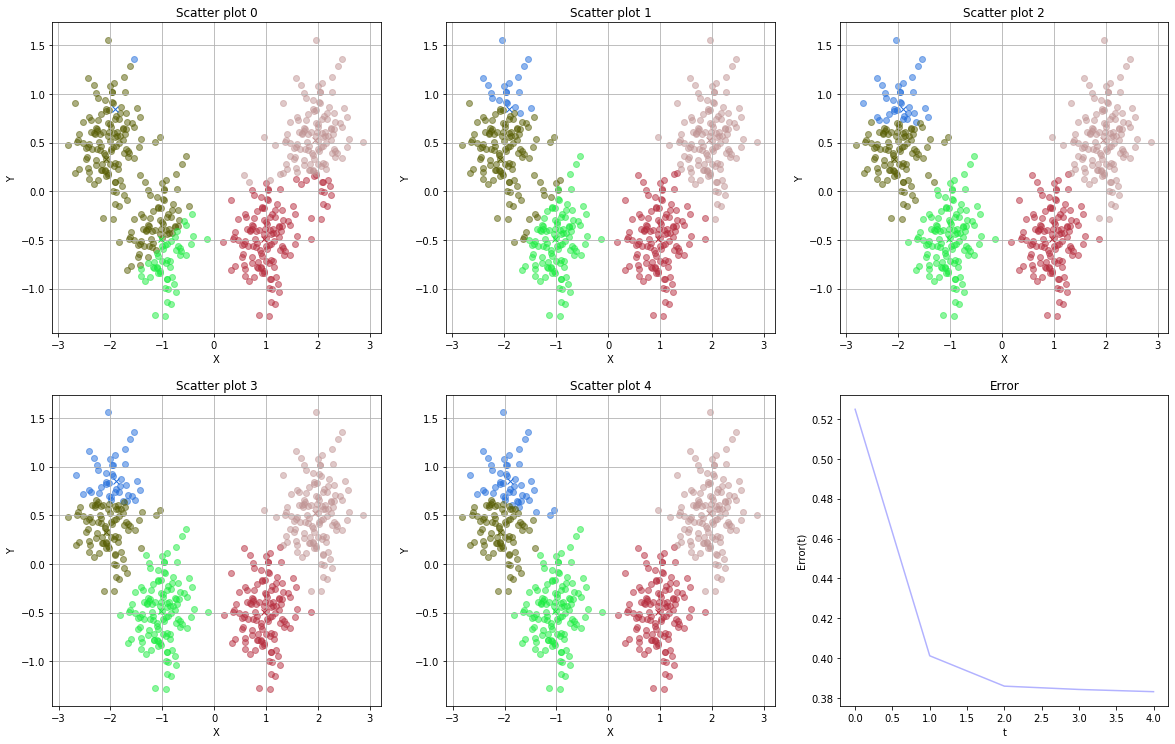

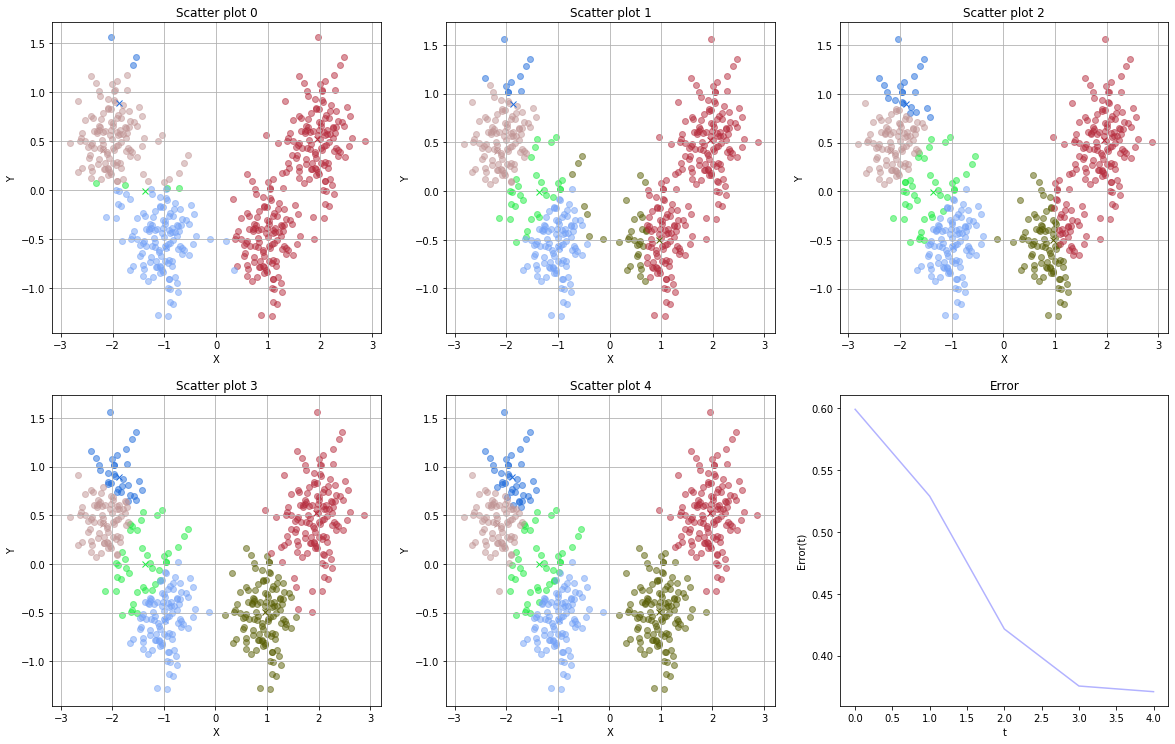

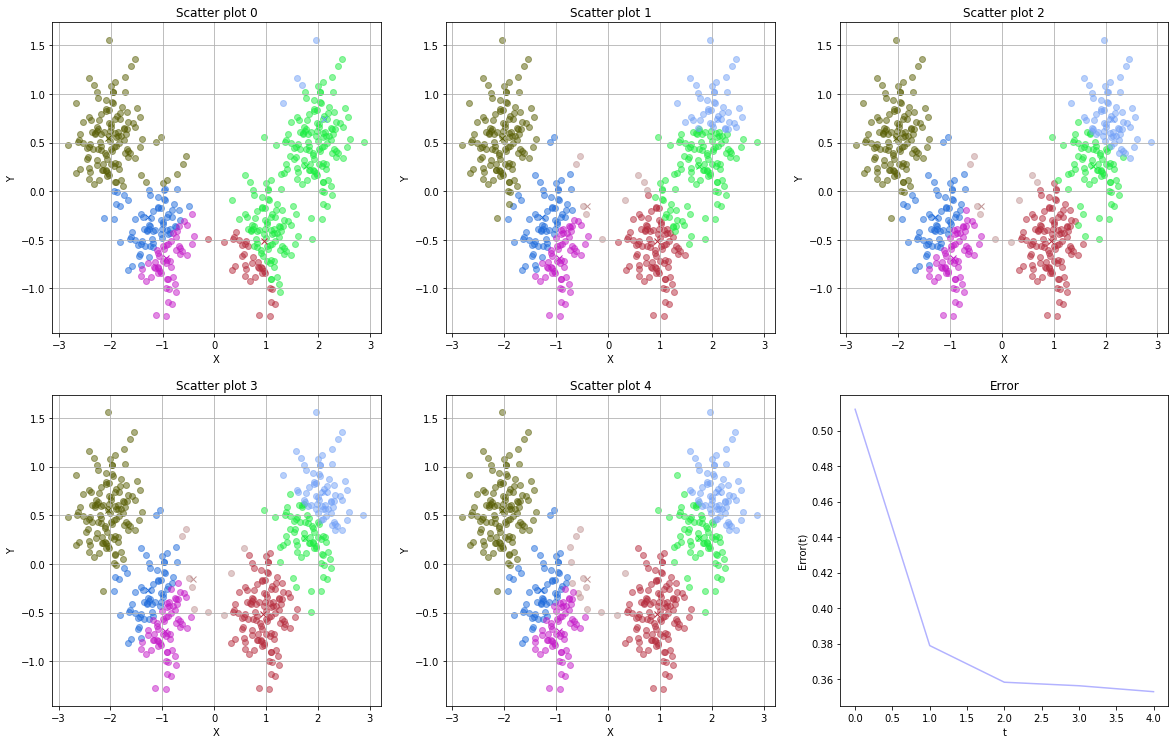

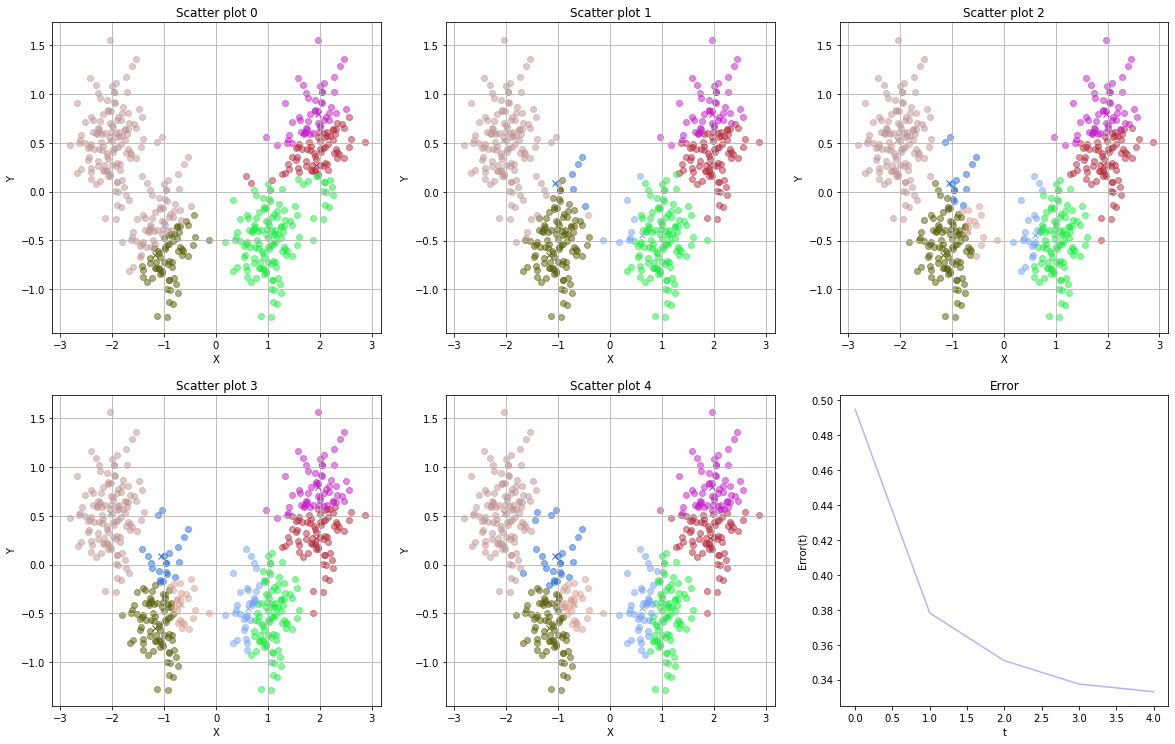

In [6]:
colors = []
for i in range(8):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
for k in range(2,9):
    x=1
    t_max = 5
    centroidsIteration, clustersIteration, errors = kMeans(k,data.values)
    plt.figure(figsize=(20, 40))

    for i in np.arange(t_max):    
        plt.subplot(t_max+1, 3, x)
        for ki in np.arange(k):
            if(clustersIteration[i][ki].size != 0):
                plt.scatter(clustersIteration[i][ki][:,0], clustersIteration[i][ki][:, 1], c=colors[ki], alpha=0.5)
                plt.plot(centroidsIteration[i][ki,0],centroidsIteration[i][ki,1], marker="x", c=colors[ki])
        plt.grid(b=bool , which='both', axis='both')
        plt.title('Scatter plot %i' %i)
        plt.xlabel("X")
        plt.ylabel("Y")
        x += 1
    plt.subplot(t_max+1, 3, x)    
    plt.plot( np.arange(t_max), errors, 'b-', alpha=0.3)
    plt.title('Error')
    plt.xlabel('t')
    plt.ylabel('Error(t)')
    

    plt.show()